# Heat Conduction Analysis

## Simple heat conduction (1D, steady state)

This notebook visualizes the results from the 1D steady-state heat conduction solver implemented in `1-conduction-simple.c` and similar codes.

The solver addresses the equation:
$$\frac{d^2 T}{dx^2} = 0$$

With boundary conditions:
- T(0) = 0
- T(1) = 1

The analytical solution is the linear profile T(x) = x, which we'll compare with our numerical results.

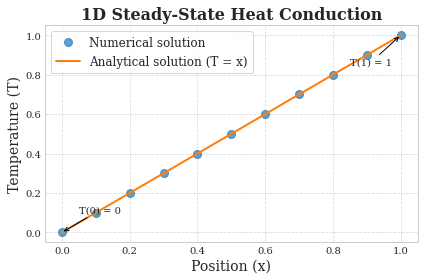

In [1]:
# ## Visualization of Results
# 
# Let's load the numerical results from our simulation and create a visualization comparing with the analytical solution.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams

# Set up nice plotting style
plt.style.use('seaborn-v0_8-whitegrid')
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
rcParams['figure.figsize'] = (10, 6)

# Load the simulation results
data = pd.read_csv('../testCases/1-conduction-simple/conduction-simple.csv', header=None, names=['x', 'T'])

# Create the figure
fig, ax = plt.subplots()

# Plot numerical solution
ax.plot(data['x'], data['T'], 'o', color='#1f77b4', markersize=8, 
         label='Numerical solution', alpha=0.7)

# Plot analytical solution (T = x)
x_analytical = np.linspace(0, 1, 100)
T_analytical = x_analytical
ax.plot(x_analytical, T_analytical, '-', color='#ff7f0e', linewidth=2, 
         label='Analytical solution (T = x)')

# Add labels and title
ax.set_xlabel('Position (x)', fontsize=14)
ax.set_ylabel('Temperature (T)', fontsize=14)
ax.set_title('1D Steady-State Heat Conduction', fontsize=16, fontweight='bold')

# Add grid and legend
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(frameon=True, fontsize=12)

# Set axis limits
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)

# Add annotations
ax.annotate('T(0) = 0', xy=(0, 0), xytext=(0.05, 0.1),
            arrowprops=dict(arrowstyle='->'))
ax.annotate('T(1) = 1', xy=(1, 1), xytext=(0.85, 0.85),
            arrowprops=dict(arrowstyle='->'))

plt.tight_layout()
plt.savefig('img/1-conduction-simple.png')
plt.show()

#### Basilisk version

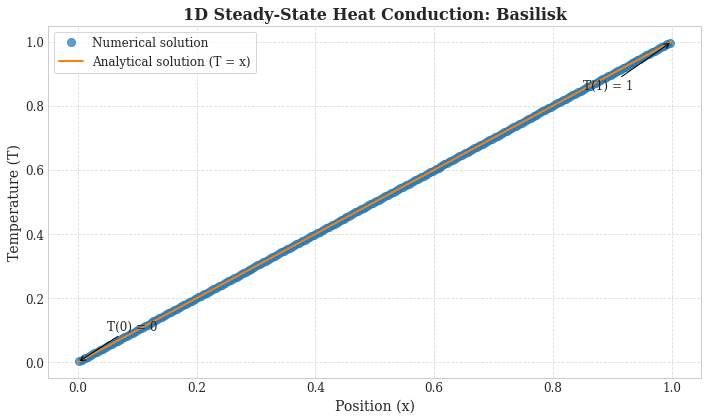

In [2]:
# ## Visualization of Results
# 
# Let's load the numerical results from our simulation and create a visualization comparing with the analytical solution.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams

# Set up nice plotting style
plt.style.use('seaborn-v0_8-whitegrid')
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
rcParams['figure.figsize'] = (10, 6)

# Load the simulation results
data = pd.read_csv('../testCases/1-conduction-simple-basilisk/conduction-simple.csv', header=None, names=['x', 'T'])

# Create the figure
fig, ax = plt.subplots()

# Plot numerical solution
ax.plot(data['x'], data['T'], 'o', color='#1f77b4', markersize=8, 
         label='Numerical solution', alpha=0.7)

# Plot analytical solution (T = x)
x_analytical = np.linspace(0, 1, 100)
T_analytical = x_analytical
ax.plot(x_analytical, T_analytical, '-', color='#ff7f0e', linewidth=2, 
         label='Analytical solution (T = x)')

# Add labels and title
ax.set_xlabel('Position (x)', fontsize=14)
ax.set_ylabel('Temperature (T)', fontsize=14)
ax.set_title('1D Steady-State Heat Conduction: Basilisk', fontsize=16, fontweight='bold')

# Add grid and legend
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(frameon=True, fontsize=12)

# Set axis limits
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)

# Add annotations
ax.annotate('T(0) = 0', xy=(0, 0), xytext=(0.05, 0.1),
            arrowprops=dict(arrowstyle='->'))
ax.annotate('T(1) = 1', xy=(1, 1), xytext=(0.85, 0.85),
            arrowprops=dict(arrowstyle='->'))

plt.tight_layout()
plt.savefig('img/1-conduction-simple-basilisk.png')
plt.show()

## Simple heat conduction (1D, transient)

This notebook visualizes the results from the 1D transient heat conduction solver implemented in `0-conduction-transient.c` and similar codes.

The solver addresses the equation:
$$\frac{\partial T}{\partial t} = \frac{\partial^2 T}{\partial x^2}$$

With boundary conditions:
- d_xT(0) = 0
- d_xT(1) = 0

With initial condition:
- T(x) = 1/(2*eps) for |x| < eps, otherwise T(x) = 0 (thin rectangular temperature profile centered at x=0)

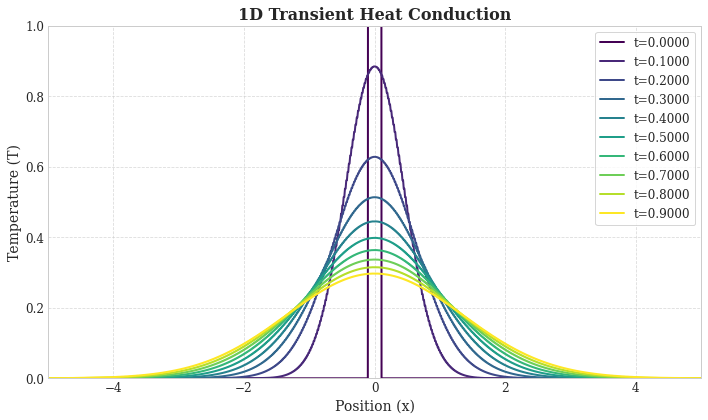

In [3]:
# ## Visualization of Results
# 
# Let's load the numerical results from our simulation and create a visualization comparing with the analytical solution.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams

# Set up nice plotting style
plt.style.use('seaborn-v0_8-whitegrid')
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
rcParams['figure.figsize'] = (10, 6)

L0 = 10.0
X0 = -L0/2
tsnap = 0.1
tmax = 1.0
timeSeries = np.arange(0, tmax, tsnap)
COLOR = plt.cm.viridis(np.linspace(0, 1, len(timeSeries)))

# Create the figure
fig, ax = plt.subplots()
for t, c in zip(timeSeries, COLOR):
    # Load the simulation results
    data = pd.read_csv(f'../testCases/1-conduction-transient/intermediate/snapshot-{t:0.4f}.csv', header=None, names=['x', 'T'])
    # Plot numerical solution
    ax.plot(data['x'], data['T'], '-', color=c, linewidth=2, label=f't={t:0.4f}')

# Add labels and title
ax.set_xlabel('Position (x)', fontsize=14)
ax.set_ylabel('Temperature (T)', fontsize=14)
ax.set_title('1D Transient Heat Conduction', fontsize=16, fontweight='bold')

# Add grid and legend
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(frameon=True, fontsize=12)

# Set axis limits
ax.set_xlim(-L0/2, L0/2)
ax.set_ylim(0.0, 1.0)

plt.tight_layout()
plt.savefig('img/1-conduction-transient.png')
plt.show()

### Comparing against the theoretical solution

The analytical solution for this problem is given by:
$$T(x,t) = \frac{1}{2\sqrt{\pi t}}e^{-x^2/4t}$$

Let's load the numerical results and compare with the analytical solution.

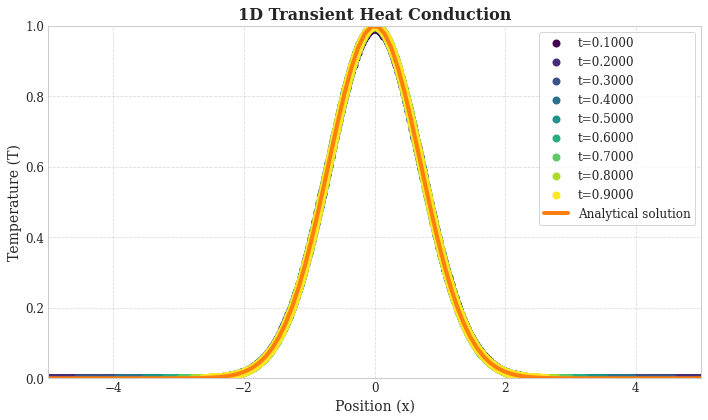

In [4]:
# ## Visualization of Results
# 
# Let's load the numerical results from our simulation and create a visualization comparing with the analytical solution.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams

# Set up nice plotting style
plt.style.use('seaborn-v0_8-whitegrid')
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
rcParams['figure.figsize'] = (10, 6)

L0 = 10.0
X0 = -L0/2
tsnap = 0.1
tmax = 1.0
timeSeries = np.arange(tsnap, tmax, tsnap)
COLOR = plt.cm.viridis(np.linspace(0, 1, len(timeSeries)))

# Create the figure
fig, ax = plt.subplots()
for t, c in zip(timeSeries, COLOR):
    # Load the simulation results
    data = pd.read_csv(f'../testCases/1-conduction-transient/intermediate/snapshot-{t:0.4f}.csv', header=None, names=['x', 'T'])
    # Plot numerical solution
    eta = data['x']/(2.0*np.sqrt(t))
    T = data['T']*np.sqrt(4.0*np.pi*t)
    ax.scatter(eta, T, color=c, linewidth=2, label=f't={t:0.4f}')

# Plot analytical solution
x_analytical = np.linspace(-L0/2, L0/2, 100)
T_analytical = np.exp(-x_analytical**2)
ax.plot(x_analytical, T_analytical, '-', color='#ff7f0e', linewidth=4, label='Analytical solution')

# Add labels and title
ax.set_xlabel('Position (x)', fontsize=14)
ax.set_ylabel('Temperature (T)', fontsize=14)
ax.set_title('1D Transient Heat Conduction', fontsize=16, fontweight='bold')

# Add grid and legend
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(frameon=True, fontsize=12)

# Set axis limits
ax.set_xlim(-L0/2, L0/2)
ax.set_ylim(0.0, 1.0)

plt.tight_layout()
plt.savefig('img/1-conduction-transient.png')
plt.show()

### Results with Basilisk

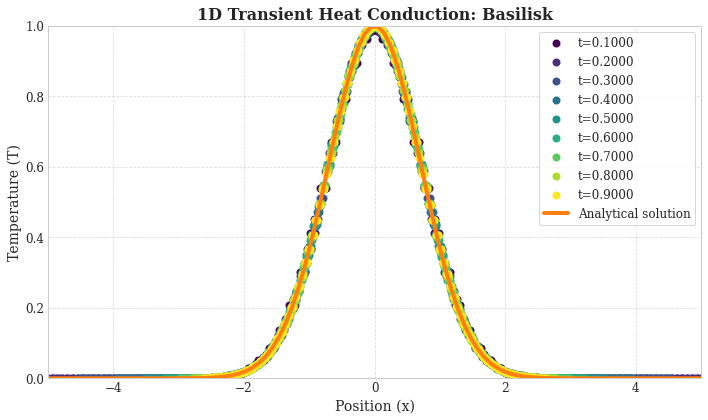

In [5]:
# ## Visualization of Results
# 
# Let's load the numerical results from our simulation and create a visualization comparing with the analytical solution.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams

# Set up nice plotting style
plt.style.use('seaborn-v0_8-whitegrid')
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
rcParams['figure.figsize'] = (10, 6)

L0 = 10.0
X0 = -L0/2
tsnap = 0.1
tmax = 1.0
timeSeries = np.arange(tsnap, tmax, tsnap)
COLOR = plt.cm.viridis(np.linspace(0, 1, len(timeSeries)))

# Create the figure
fig, ax = plt.subplots()
for t, c in zip(timeSeries, COLOR):
    # Load the simulation results
    data = pd.read_csv(f'../testCases/1-conduction-transient-basilisk/intermediate/snapshot-{t:0.4f}.csv', header=None, names=['x', 'T'])
    # Plot numerical solution
    eta = data['x']/(2.0*np.sqrt(t))
    T = data['T']*np.sqrt(4.0*np.pi*t)
    ax.scatter(eta, T, color=c, linewidth=2, label=f't={t:0.4f}')

# Plot analytical solution
x_analytical = np.linspace(-L0/2, L0/2, 100)
T_analytical = np.exp(-x_analytical**2)
ax.plot(x_analytical, T_analytical, '-', color='#ff7f0e', linewidth=4, label='Analytical solution')

# Add labels and title
ax.set_xlabel('Position (x)', fontsize=14)
ax.set_ylabel('Temperature (T)', fontsize=14)
ax.set_title('1D Transient Heat Conduction: Basilisk', fontsize=16, fontweight='bold')

# Add grid and legend
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(frameon=True, fontsize=12)

# Set axis limits
ax.set_xlim(-L0/2, L0/2)
ax.set_ylim(0.0, 1.0)

plt.tight_layout()
plt.savefig('img/1-conduction-transient-basilisk.png')
plt.show()

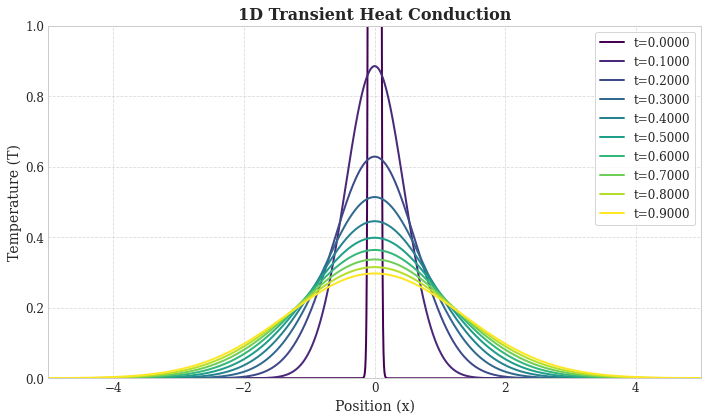

In [6]:
# ## Visualization of Results
# 
# Let's load the numerical results from our simulation and create a visualization comparing with the analytical solution.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams

# Set up nice plotting style
plt.style.use('seaborn-v0_8-whitegrid')
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
rcParams['figure.figsize'] = (10, 6)

L0 = 10.0
X0 = -L0/2
tsnap = 0.1
tmax = 1.0
timeSeries = np.arange(0, tmax, tsnap)
COLOR = plt.cm.viridis(np.linspace(0, 1, len(timeSeries)))

# Create the figure
fig, ax = plt.subplots()
for t, c in zip(timeSeries, COLOR):
    # Load the simulation results
    data = pd.read_csv(f'../testCases/1-conduction-transient-basilisk-withHeaders/intermediate/snapshot-{t:0.4f}.csv', header=None, names=['x', 'T'])
    # Plot numerical solution
    ax.plot(data['x'], data['T'], '-', color=c, linewidth=2, label=f't={t:0.4f}')

# Add labels and title
ax.set_xlabel('Position (x)', fontsize=14)
ax.set_ylabel('Temperature (T)', fontsize=14)
ax.set_title('1D Transient Heat Conduction', fontsize=16, fontweight='bold')

# Add grid and legend
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(frameon=True, fontsize=12)

# Set axis limits
ax.set_xlim(-L0/2, L0/2)
ax.set_ylim(0.0, 1.0)

plt.tight_layout()
plt.savefig('img/1-conduction-transient-basilisk-withHeaders-NonUniversal.png')
plt.show()

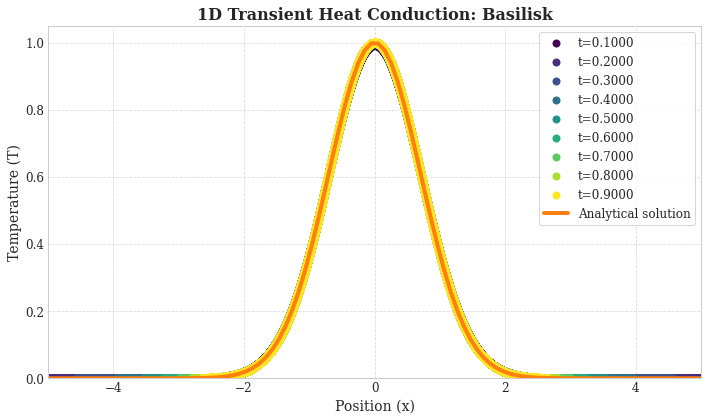

In [7]:
# ## Visualization of Results
# 
# Let's load the numerical results from our simulation and create a visualization comparing with the analytical solution.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams

# Set up nice plotting style
plt.style.use('seaborn-v0_8-whitegrid')
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
rcParams['figure.figsize'] = (10, 6)

L0 = 10.0
tsnap = 0.1
tmax = 1.0
timeSeries = np.arange(tsnap, tmax, tsnap)
COLOR = plt.cm.viridis(np.linspace(0, 1, len(timeSeries)))

# Create the figure
fig, ax = plt.subplots()
for t, c in zip(timeSeries, COLOR):
    # Load the simulation results
    data = pd.read_csv(f'../testCases/1-conduction-transient-basilisk-withHeaders/intermediate/snapshot-{t:0.4f}.csv', header=None, names=['x', 'T'])
    # Plot numerical solution
    eta = data['x']/(2.0*np.sqrt(t))
    T = data['T']*np.sqrt(4.0*np.pi*t)
    ax.scatter(eta, T, color=c, linewidth=2, label=f't={t:0.4f}')

# Plot analytical solution
x_analytical = np.linspace(-L0/2, L0/2, 100)
T_analytical = np.exp(-x_analytical**2)
ax.plot(x_analytical, T_analytical, '-', color='#ff7f0e', linewidth=4, label='Analytical solution')

# Add labels and title
ax.set_xlabel('Position (x)', fontsize=14)
ax.set_ylabel('Temperature (T)', fontsize=14)
ax.set_title('1D Transient Heat Conduction: Basilisk', fontsize=16, fontweight='bold')

# Add grid and legend
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(frameon=True, fontsize=12)

# Set axis limits
ax.set_xlim(-L0/2, L0/2)
ax.set_ylim(0.0, 1.05)

plt.tight_layout()
plt.savefig('img/1-conduction-transient-basilisk-withHeaders.png')
plt.show()